<a href="https://colab.research.google.com/github/marszzzs/neuro/blob/main/HomeWork_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загрузите датасет

In [ ]:
import pandas as pd

In [ ]:
#впишите код

Сформируйте столбец ECG_TIME_DATE, в котором объедение время, указанное в толбце eeg_time и eeg_date

In [ ]:
#впишите код

Оформите график количества проведенных исследований Count_subj ЭКГ по годам

In [ ]:
#впишите ваш код

Постройте scatter_plot показывающей распеределение классов 0,1 (больной, здоровый) по двум параметрам: t_end, t_axis.
Какие выводы можно сделать из получившегося графика?

In [ ]:
#впишите ваш код

**Основная задача**

При помощи простейшей модели нейросети (см. семинар №2), научиться определять больного и здорового пациента.
Для выполнения данной задачи не все данные в датасете подойдут.
Для определения классов использовать столбец Healthy_Status.
Для определения параметров столбцы: rr_interval, pp_onset, p_end, qrs_onset, qrs_end, t_end, p_axis, qrs_axis, t_axis

In [ ]:
#впишите ваш код

После обучения модели добавьте столбец filtering к параметрам, на сколько изменилось качество?

In [ ]:
#впишите ваш код

Задача: выполните нормализацию данных. Обучите модель, на сколько улучшилось качество обучения?

In [ ]:
#впишите ваш код

Сохраните коэффициенты вашей лучшей модели в отдельный файлы и залейте его на GITHUB, в соотвтетсвующем коммите напишите сови Фамилию Имя, номер группы

In [ ]:
#впишите ваш код

Saving test_data_ECG.csv to test_data_ECG (3).csv
Index(['subject_id', 'Count_subj', 'study_id', 'cart_id', 'Healthy_Status',
       'eeg_time', 'eeg_date', 'report_0', 'report_1', 'report_2', 'report_3',
       'report_4', 'report_5', 'report_6', 'report_7', 'report_8', 'report_9',
       'report_10', 'report_11', 'report_12', 'report_13', 'report_14',
       'report_15', 'report_16', 'report_17', 'bandwidth', 'filtering',
       'rr_interval', 'p_onset', 'p_end', 'qrs_onset', 'qrs_end', 't_end',
       'p_axis', 'qrs_axis', 't_axis'],
      dtype='object')
     eeg_date  year
0  27.06.2015  2015
1  27.06.2015  2015
2  28.06.2015  2015
3  15.07.2015  2015
4  27.09.2015  2015


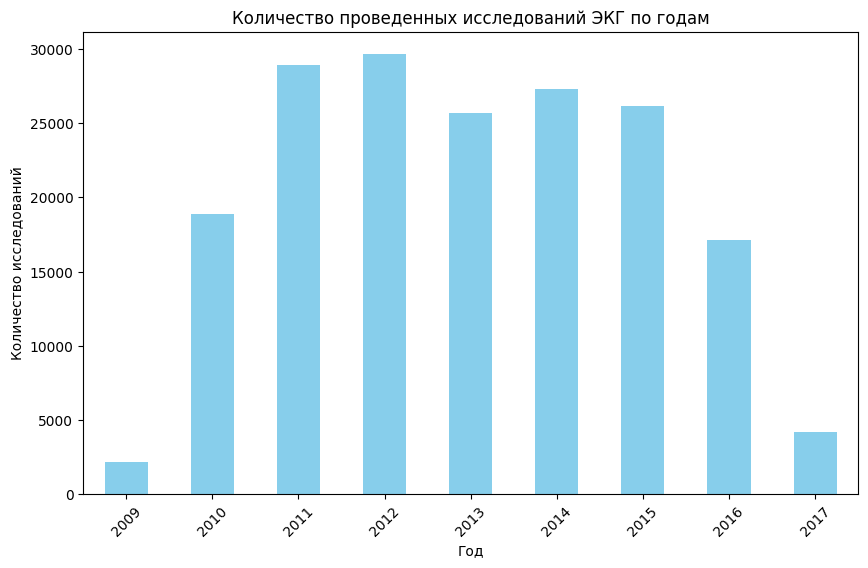

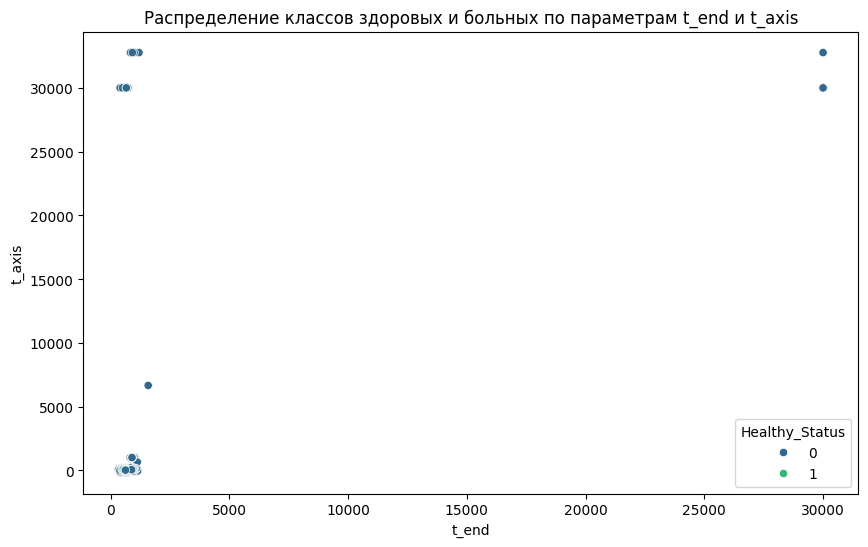

Epoch 10/100, Loss: 0.914089560508728
Epoch 20/100, Loss: 0.8894956111907959
Epoch 30/100, Loss: 0.8574039936065674
Epoch 40/100, Loss: 0.8136610388755798
Epoch 50/100, Loss: 0.7621399164199829
Epoch 60/100, Loss: 0.703978419303894
Epoch 70/100, Loss: 0.643614649772644
Epoch 80/100, Loss: 0.5797581672668457
Epoch 90/100, Loss: 0.5239097476005554
Epoch 100/100, Loss: 0.482534795999527
Accuracy on test data: 79.40%
Параметры модели сохранены в 'simple_nn_model.pth'.
Коэффициенты модели сохранены в файл best_model_weights.pth


In [8]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка датасета
from google.colab import files
uploaded = files.upload()

# Загрузка данных в DataFrame
df = pd.read_csv('test_data_ECG.csv')

# Удаляем лишние пробелы в названиях столбцов
df.columns = df.columns.str.strip()

# Проверка на успешную загрузку и корректные названия столбцов
print(df.columns)

# (Пропускаем шаг объединения столбцов eeg_date и eeg_time)

# Извлекаем год из столбца eeg_date для анализа по годам
# Убедимся, что формат даты распознан корректно
df['year'] = pd.to_datetime(df['eeg_date'], format='%d.%m.%Y', errors='coerce').dt.year

# Проверка корректности извлечения года
print(df[['eeg_date', 'year']].head())

# Подсчёт количества исследований по годам
count_by_year = df.groupby('year')['Count_subj'].sum()

# Построение графика количества исследований по годам
plt.figure(figsize=(10, 6))
count_by_year.plot(kind='bar', color='skyblue')
plt.title('Количество проведенных исследований ЭКГ по годам')
plt.xlabel('Год')
plt.ylabel('Количество исследований')
plt.xticks(rotation=45)
plt.show()

# Построение scatter plot для классов 0 и 1 по параметрам t_end и t_axis
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='t_end', y='t_axis', hue='Healthy_Status', palette='viridis')
plt.title('Распределение классов здоровых и больных по параметрам t_end и t_axis')
plt.xlabel('t_end')
plt.ylabel('t_axis')
plt.show()

# Обучение простой модели нейросети
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Выбор признаков и целевой переменной
features = ['rr_interval', 'p_onset', 'p_end', 'qrs_onset', 'qrs_end', 't_end', 'p_axis', 'qrs_axis', 't_axis']
target = 'Healthy_Status'

# Обработка данных для модели
X = df[features].fillna(0)  # Заполняем пропуски значением 0
y = df[target]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Определение простой модели нейронной сети
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(len(features), 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 2)  # Два выхода для классов 0 и 1

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Инициализация модели, функции потерь и оптимизатора
model = SimpleNN()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Преобразование данных в тензоры для PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)


# Обучение модели
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = loss_fn(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

# Оценка точности модели на тестовых данных
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = accuracy_score(y_test_tensor, predicted)
    print(f"Accuracy on test data: {accuracy * 100:.2f}%")

# Сохранение параметров модели в файл
torch.save(model.state_dict(), 'simple_nn_model.pth')
print("Параметры модели сохранены в 'simple_nn_model.pth'.")

import torch

# model — обученная модель
torch.save(model.state_dict(), 'best_model_weights.pth')
print("Коэффициенты модели сохранены в файл best_model_weights.pth")


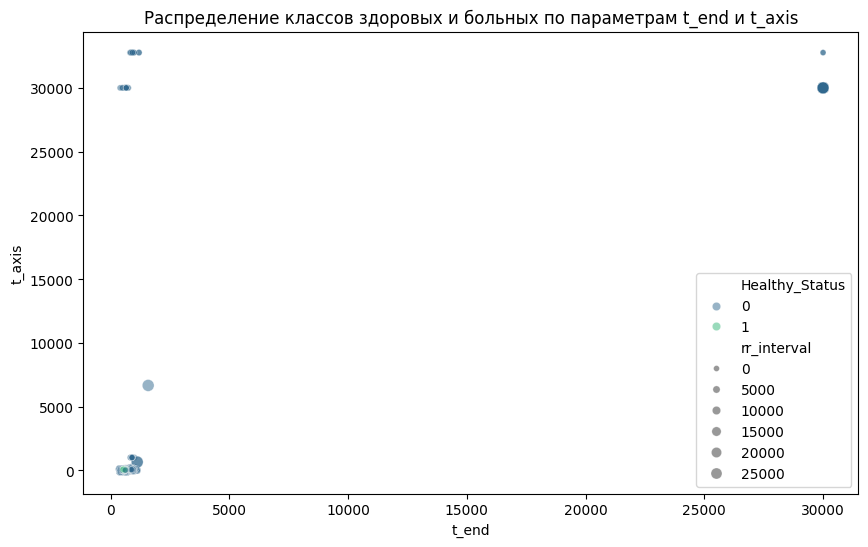

In [28]:
# Добавим transparency
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='t_end', y='t_axis', hue='Healthy_Status',
                alpha=0.5,
                size='rr_interval',
                palette='viridis')
plt.title('Распределение классов здоровых и больных по параметрам t_end и t_axis')
plt.xlabel('t_end')
plt.ylabel('t_axis')
plt.show()

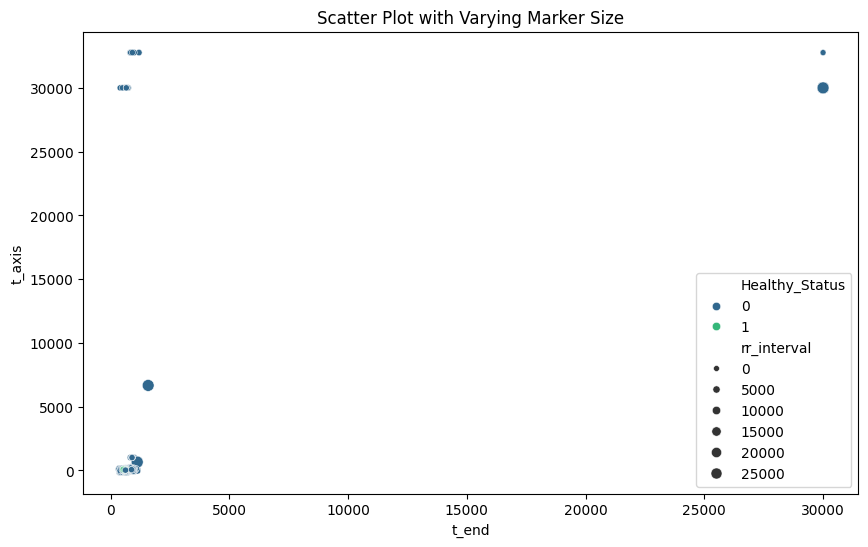

In [4]:
# Поменяем размер маркера
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='t_end', y='t_axis', hue='Healthy_Status',
                size='rr_interval',
                palette='viridis')
plt.title('Scatter Plot with Varying Marker Size')
plt.xlabel('t_end')
plt.ylabel('t_axis')
plt.show()

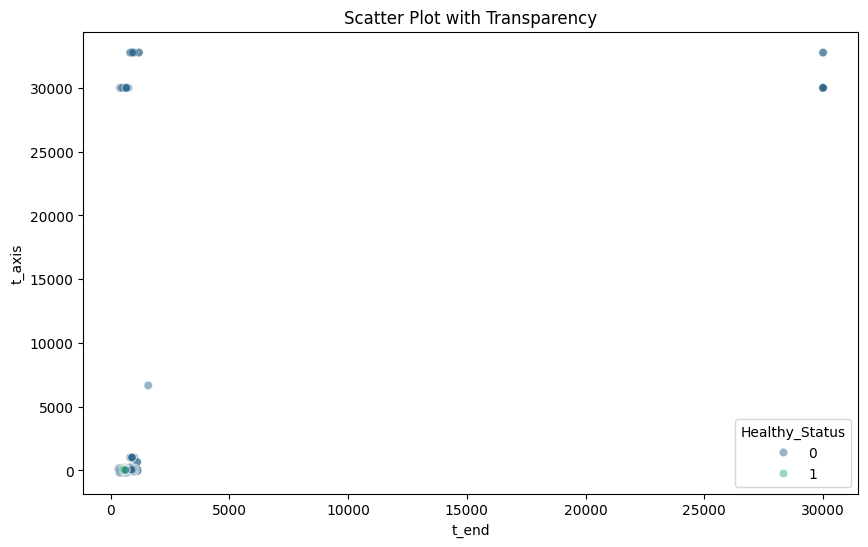

In [18]:
# Поменяем transparency
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='t_end', y='t_axis', hue='Healthy_Status',
                alpha=0.5,
                palette='viridis')
plt.title('Scatter Plot with Transparency')
plt.xlabel('t_end')
plt.ylabel('t_axis')
plt.show()

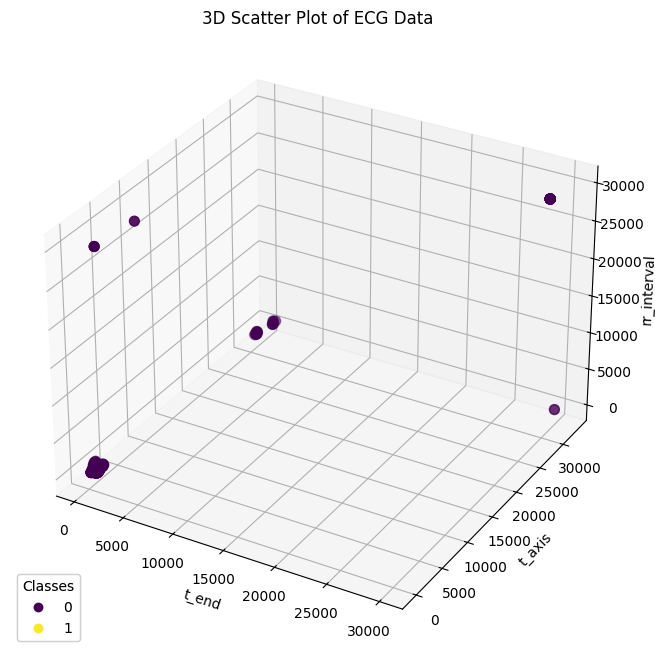

In [5]:
# Добавим третье измерение для визуализации (хз)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Создаем фигуру и оси для 3D графика
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Строим scatter plot с тремя измерениями
# Здесь 'rr_interval' используется как третье измерение (z)
scatter = ax.scatter(df['t_end'], df['t_axis'], df['rr_interval'],
                    c=df['Healthy_Status'], cmap='viridis', s=50)  # s - размер маркера

# Настраиваем оси и заголовок
ax.set_xlabel('t_end')
ax.set_ylabel('t_axis')
ax.set_zlabel('rr_interval')  # Название третьего измерения
ax.set_title('3D Scatter Plot of ECG Data')

# Добавляем легенду
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

plt.show()